In [2]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np

finn_key = 'sandbox_cc7v412ad3i03fardc9g'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [3]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [57]:
#def function to create a stock chart for the price/date and volume
def plot_chart(dataframe, stock_name, year):
    fig= plt.figure(figsize=(20,15))
    top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    fig.tight_layout();

In [26]:
microsoft2020 = stock_df('MSFT', beg_2020, end_2020)
stock_date2020 = microsoft2020.set_index('Time')
stock_date2020

,Close,High,Low,Open,Volume
Time,,,,,
2019-12-26,123.282900,123.492000,122.631000,123.000000,86
2020-01-02,123.837673,124.047714,123.182840,123.553500,63
2020-01-09,123.923327,124.605929,123.737162,124.109491,88
2020-01-16,123.675480,124.356717,123.489688,123.861272,47
2020-01-23,123.897860,124.108003,123.242709,123.613549,24
2020-01-30,123.983555,124.666489,123.797301,124.169810,47
2020-02-06,123.735588,124.417156,123.549706,123.921471,48
2020-02-13,123.488117,124.168322,123.302607,123.673628,87
2020-02-20,123.710161,123.919986,123.056002,123.426280,28


In [56]:
microsoft2021 = stock_df('MSFT', beg_2021, end_2021)
stock_date2021 = microsoft2021.set_index('Time')
stock_date2021.head()

,Close,High,Low,Open,Volume
Time,,,,,
2020-12-31,122.815500,123.492000,122.631000,123.000000,41
2021-01-07,122.569869,123.245016,122.385738,122.754000,94
2021-01-14,122.790262,122.998526,122.140967,122.508492,67
2021-01-21,122.875191,123.552019,122.690601,123.059780,41
2021-01-28,122.629440,123.304915,122.445220,122.813661,22


In [7]:
microsoft2019 = stock_df('MSFT', beg_2019, end_2019)
stock_date2019 = microsoft2019.set_index('Time')
stock_date2019.head()

,Close,High,Low,Open,Volume
Time,,,,,
2018-12-27,122.815500,123.492000,122.631000,123.000000,83
2019-01-03,123.036334,123.245016,122.385738,122.754000,59
2019-01-10,123.121433,123.799619,122.936474,123.306393,87
2019-01-17,123.342818,123.552019,122.690601,123.059780,85
2019-01-24,123.897860,124.108003,123.242709,123.613549,42


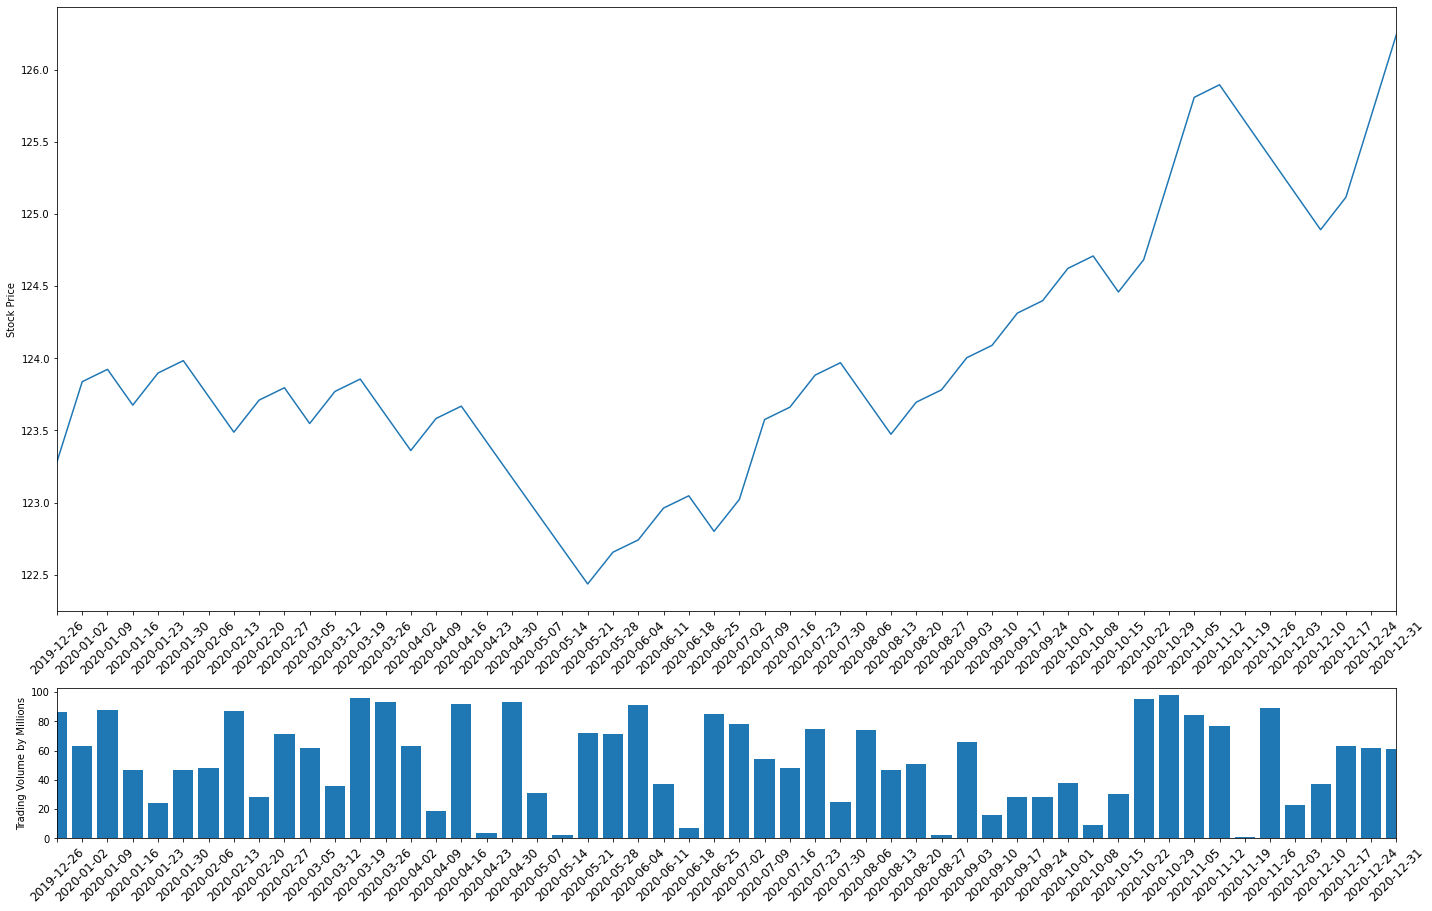

In [27]:
fig= plt.figure(figsize=(20,15))
top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_plt.plot(stock_date2020.index, stock_date2020['Close'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Stock Price')
bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_date2020.index, stock_date2020['Volume'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Trading Volume by Millions')
fig.tight_layout();

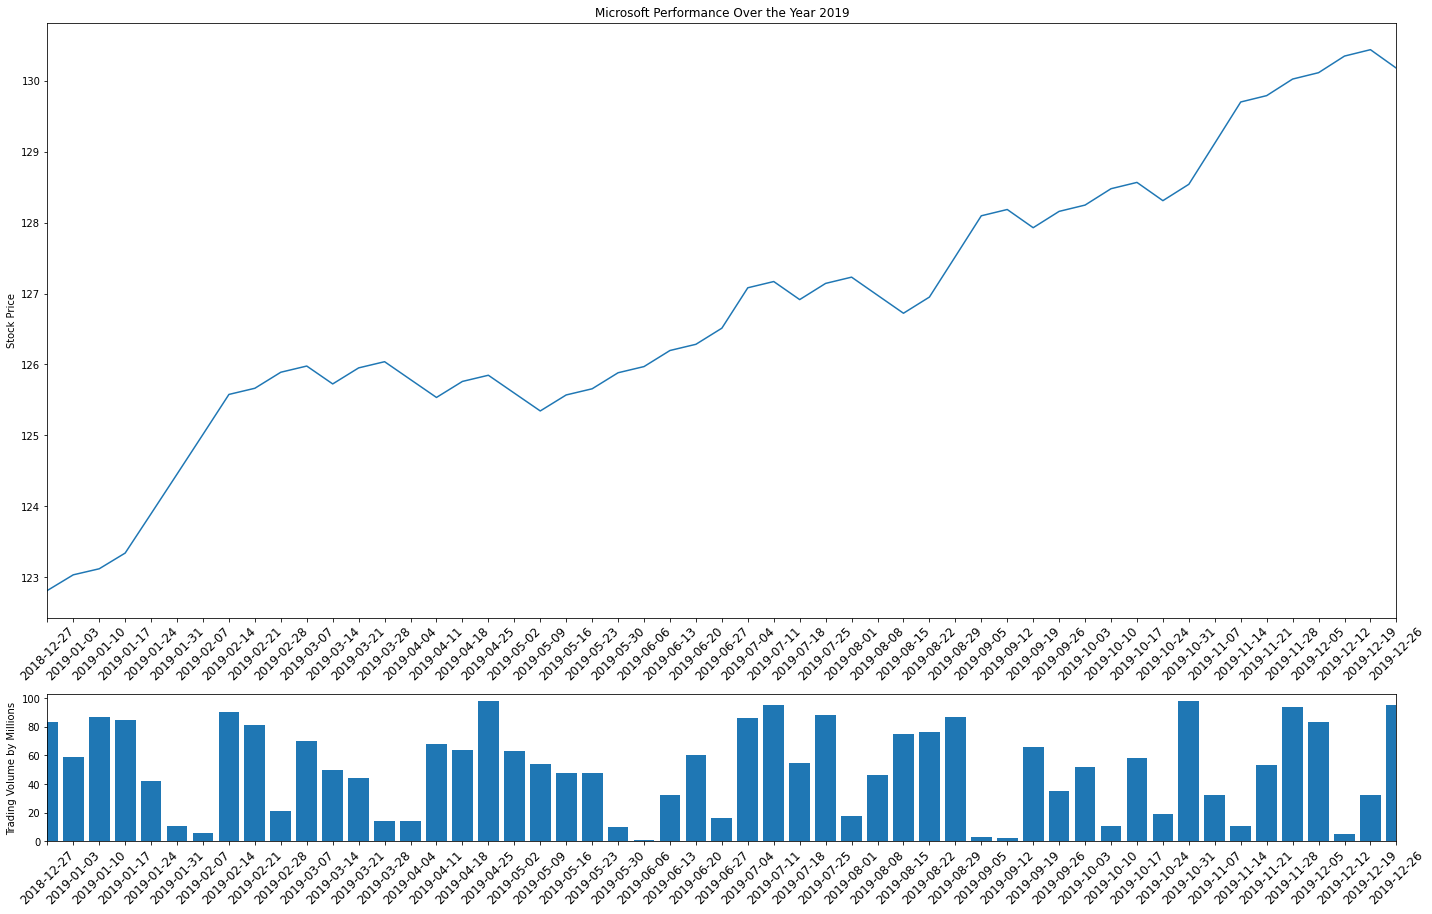

In [51]:
plot_chart(stock_date2019,'Microsoft',2019)